In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


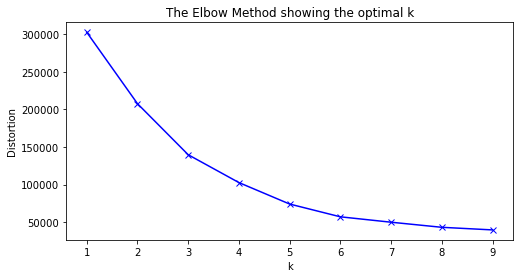

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
from sklearn.cluster import KMeans

# definizione dei parametri del metodo: notare che stabiliamo il numero di cluster da ricercare
kmeans = KMeans(n_clusters=6)

# determinazione dei cluster
clusters=kmeans.fit_predict(X)
clusters


array([1, 5, 1, 4, 3, 4, 4, 2, 3, 4, 4, 3, 0, 1, 2, 4, 4, 1, 3, 3, 4, 4,
       2, 4, 5, 2, 3, 4, 5, 3, 0, 3, 3, 1, 2, 4, 0, 3, 2, 2, 2, 1, 0, 3,
       1, 4, 4, 3, 0, 5, 1, 0, 0, 2, 3, 2, 3, 4, 0, 2, 4, 3, 5, 3, 5, 0,
       1, 0, 0, 1, 4, 3, 2, 4, 3, 1, 0, 4, 0, 1, 3, 0, 3, 5, 4, 2, 2, 2,
       3, 2, 2, 2, 1, 0, 3, 3, 4, 0, 0, 1, 3, 3, 1, 2, 0, 3, 2, 2, 4, 2,
       4, 4, 4, 3, 3, 2, 2, 5, 4, 4, 5, 0, 0, 0, 3, 2, 0, 1, 3, 2, 3, 4,
       2, 3, 3, 2, 3, 3, 3, 3, 0, 1, 4, 0, 4, 0, 0, 1, 0, 2, 2, 1, 2, 1,
       3, 2, 0, 2, 4, 2, 3, 3, 5, 3, 3, 0, 3, 3, 5, 3, 2, 5, 5, 2, 0, 0,
       1, 4, 3, 3, 2, 3, 5, 4, 0, 3, 3, 3, 3, 0, 2, 4, 5, 0, 1, 0, 2, 2,
       1, 4, 4, 5, 0, 1, 5, 2, 3, 0, 2, 5, 2, 0, 3, 1, 0, 4, 3, 4, 2, 4,
       4, 4, 2, 4, 0, 4, 3, 4, 0, 5, 0, 0, 4, 5, 1, 3, 4, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 0, 2, 0, 5, 3, 2, 2, 0, 1, 3, 0, 2, 3, 3, 4,
       2, 4, 3, 3, 3, 5, 1, 4, 4, 0, 4, 0, 4, 1, 4, 4, 3, 1, 0, 3, 2, 2,
       2, 0, 2, 5, 1, 2, 1, 2, 5, 3, 2, 3, 3, 0, 2,

In [39]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

0.4537364862932958

In [40]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

165.60961744144885

In [36]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

0.8755409474799637

MEAN SHIFT

In [53]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=50)
print(bandwidth)

3.4895438197551623


In [54]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusters=ms.fit_predict(X)
labels_unique = np.unique(ms.labels_)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


In [66]:
data['class'] = clusters.tolist()

ValueError: Length of values (400) does not match length of index (198)